This week, we will talk about how to identify the peaks from a time series. For example, the 2nd figure below. How do we find out all the location of the peaks? let's play with the coastal water level data from [NOAA](https://www.ngdc.noaa.gov/hazard/tide/). You can choose the station you like. I choose the one at San Francisco, station - 9414290, the latitude and longitude of this station are 37.806331634, -122.465919494, you can see the station location on the following map:

![image.png](./Finding_peaks_in_time_series_files/station_map.png)

I just downloaded the first 12 days in 2018, you can also quickly download this data from [my repo here](https://github.com/qingkaikong/blog/tree/master/2018_31_finding_peaks/data). You can find the notebook on [Qingkai's Github](https://github.com/qingkaikong/blog/tree/master/2018_31_finding_peaks) written in Python3. 

Let's first plot the time series data for the water level at this location.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-poster')

%matplotlib inline

In [2]:
df_water_level = pd.read_csv('./data/9414290_20180101to20181231.csv', skiprows = 10, delimiter='\t', names=['datetime', 'water_level'])
df_water_level['datetime'] = pd.to_datetime(df_water_level['datetime'])
df_water_level = df_water_level.set_index('datetime')

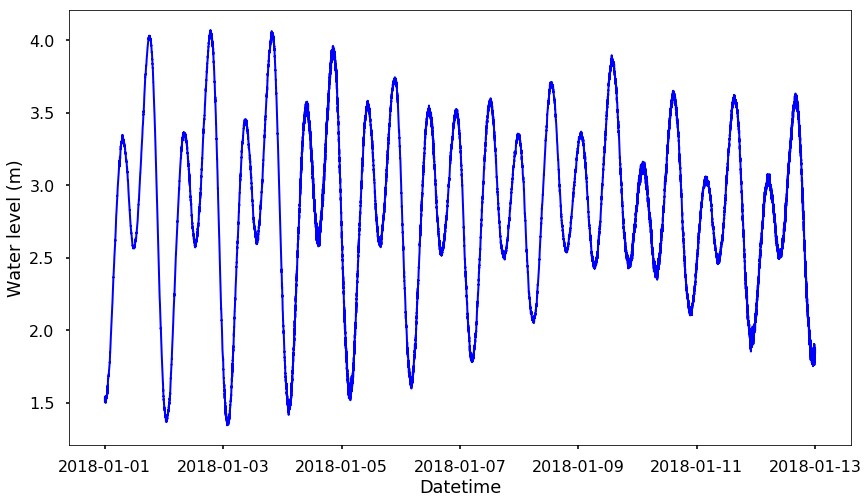

In [3]:
plt.figure(figsize = (14, 8))
plt.plot_date(df_water_level.index, df_water_level.water_level, 'b-', linewidth = 2)
plt.xlabel('Datetime')
plt.ylabel('Water level (m)')
plt.show()

## Let's find the peak

Since version 1.1.0, scipy added in the new function find_peaks that gives you an easy way to find peaks from a data series. It has various arguments that you can control how you want to identify the peaks. You can find more details and more advanced examples [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html). The two arguments I found really useful and easy to use is the height and distance. The height argument is the required height of peaks. And the distance is the required minimal horizontal distance in samples between neighboring peaks. Let's use see more in the following example

In [4]:
import scipy.signal

Here, we can see from the figure that all the positive peaks are roughly higher than 2.5, therefore, we set height = 2.5, which means that it will detect the peaks that higher than 2.5. Then for the distance parameter, I usually play with different numbers and see which one gives me the best result, for this case, I found distance = 500 is fine.  

In [5]:
# find all the peaks that associated with the positive peaks
peaks_positive, _ = scipy.signal.find_peaks(df_water_level.water_level, height = 2.5, threshold = None, distance=500)

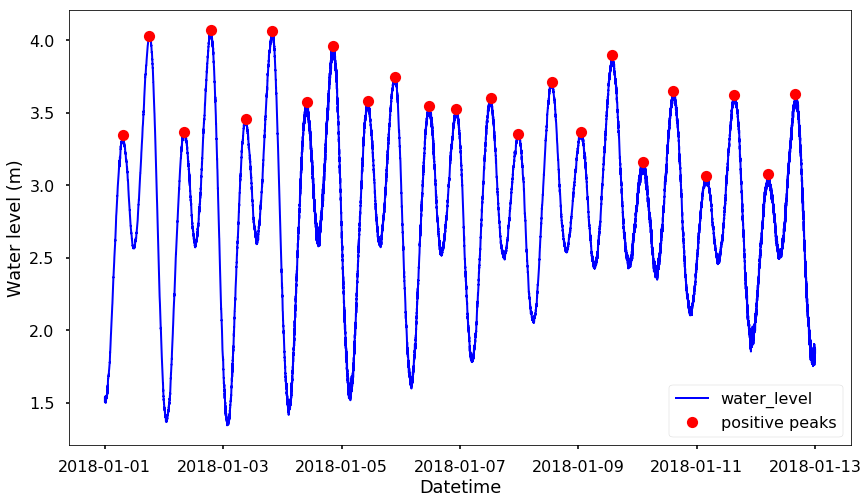

In [6]:
plt.figure(figsize = (14, 8))
plt.plot_date(df_water_level.index, df_water_level.water_level, 'b-', linewidth = 2)

plt.plot_date(df_water_level.index[peaks_positive], df_water_level.water_level[peaks_positive], 'ro', label = 'positive peaks')

plt.xlabel('Datetime')
plt.ylabel('Water level (m)')
plt.legend(loc = 4)
plt.show()

One thing is that, this find_peaks function can only detect the 'real' peaks, but not the troughs. You can see none of the troughs in the above figure were identified. One simple solution is that, we flip the data so that all the troughs become peaks. And now we could identify all the peaks and troughs. 

In [7]:
# find all the peaks that associated with the negative peaks
peaks_negative, _ = scipy.signal.find_peaks(-df_water_level.water_level, height = -3, threshold = None, distance=500)

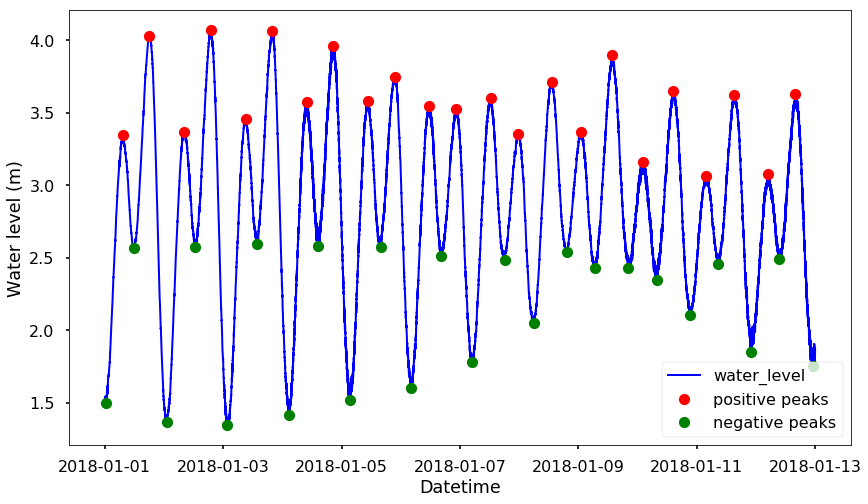

In [8]:
plt.figure(figsize = (14, 8))
plt.plot_date(df_water_level.index, df_water_level.water_level, 'b-', linewidth = 2)

plt.plot_date(df_water_level.index[peaks_positive], df_water_level.water_level[peaks_positive], 'ro', label = 'positive peaks')
plt.plot_date(df_water_level.index[peaks_negative], df_water_level.water_level[peaks_negative], 'go', label = 'negative peaks')

plt.xlabel('Datetime')
plt.ylabel('Water level (m)')
plt.legend(loc = 4)
plt.show()

Of course, there are various arguments that we could use to filter out the unwanted peaks, see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) for more details. 